## Importing libraries

In [78]:
import pandas as pd
import numpy as np

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] =(12,5)
plt.rcParams['font.size'] = 10
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading dataset

In [80]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [81]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [82]:
import pandas_profiling

In [83]:
train.profile_report()

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [84]:
train.sample(5)

PassengerId  Survived  Pclass                                       Name  \
87            88         0       3              Slocovski, Mr. Selman Francis   
577          578         1       1  Silvey, Mrs. William Baird (Alice Munger)   
246          247         0       3      Lindahl, Miss. Agda Thorilda Viktoria   
621          622         1       1               Kimball, Mr. Edwin Nelson Jr   
492          493         0       1                 Molson, Mr. Harry Markland   

        Sex   Age  SibSp  Parch           Ticket     Fare Cabin Embarked  
87     male   NaN      0      0  SOTON/OQ 392086   8.0500   NaN        S  
577  female  39.0      1      0            13507  55.9000   E44        S  
246  female  25.0      0      0           347071   7.7750   NaN        S  
621    male  42.0      1      0            11753  52.5542   D19        S  
492    male  55.0      0      0           113787  30.5000   C30        S

In [85]:
test.sample(5)

PassengerId  Pclass                                     Name     Sex  \
97           989       3                Makinen, Mr. Kalle Edvard    male   
188         1080       3                          Sage, Miss. Ada  female   
132         1024       3            Lefebre, Mrs. Frank (Frances)  female   
75           967       1                       Keeping, Mr. Edwin    male   
199         1091       3  Rasmussen, Mrs. (Lena Jacobsen Solvang)  female   

      Age  SibSp  Parch             Ticket      Fare Cabin Embarked  
97   29.0      0      0  STON/O 2. 3101268    7.9250   NaN        S  
188   NaN      8      2           CA. 2343   69.5500   NaN        S  
132   NaN      0      4               4133   25.4667   NaN        S  
75   32.5      0      0             113503  211.5000  C132        C  
199   NaN      0      0              65305    8.1125   NaN        S

In [89]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

## Cleaning data

In [90]:
#Check missig values

In [91]:
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(train)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

In [92]:
missing_values(train)

Total  Percentage
Cabin          687       77.10
Age            177       19.87
Embarked         2        0.22
Fare             0        0.00
Ticket           0        0.00
Parch            0        0.00
SibSp            0        0.00
Sex              0        0.00
Name             0        0.00
Pclass           0        0.00
Survived         0        0.00
PassengerId      0        0.00

In [93]:
missing_values(test)

Total  Percentage
Cabin          327       36.70
Age             86        9.65
Fare             1        0.11
Embarked         0        0.00
Ticket           0        0.00
Parch            0        0.00
SibSp            0        0.00
Sex              0        0.00
Name             0        0.00
Pclass           0        0.00
PassengerId      0        0.00

In [94]:
train.loc[:, 'Embarked'].value_counts().to_frame()

Embarked
S       644
C       168
Q        77

In [95]:
# function to find missing values

def percent_value_count(df, feature):
    total = df.loc[:, feature].value_counts(dropna=False).to_frame(name='Total')
    percent = df.loc[:, feature].value_counts(dropna=False, normalize=True).to_frame(name='Percent')
    
    return pd.concat([total, percent], axis=1)

In [96]:
percent_value_count(train, 'Embarked')

Total   Percent
S      644  0.722783
C      168  0.188552
Q       77  0.086420
NaN      2  0.002245

In [97]:
train[train['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

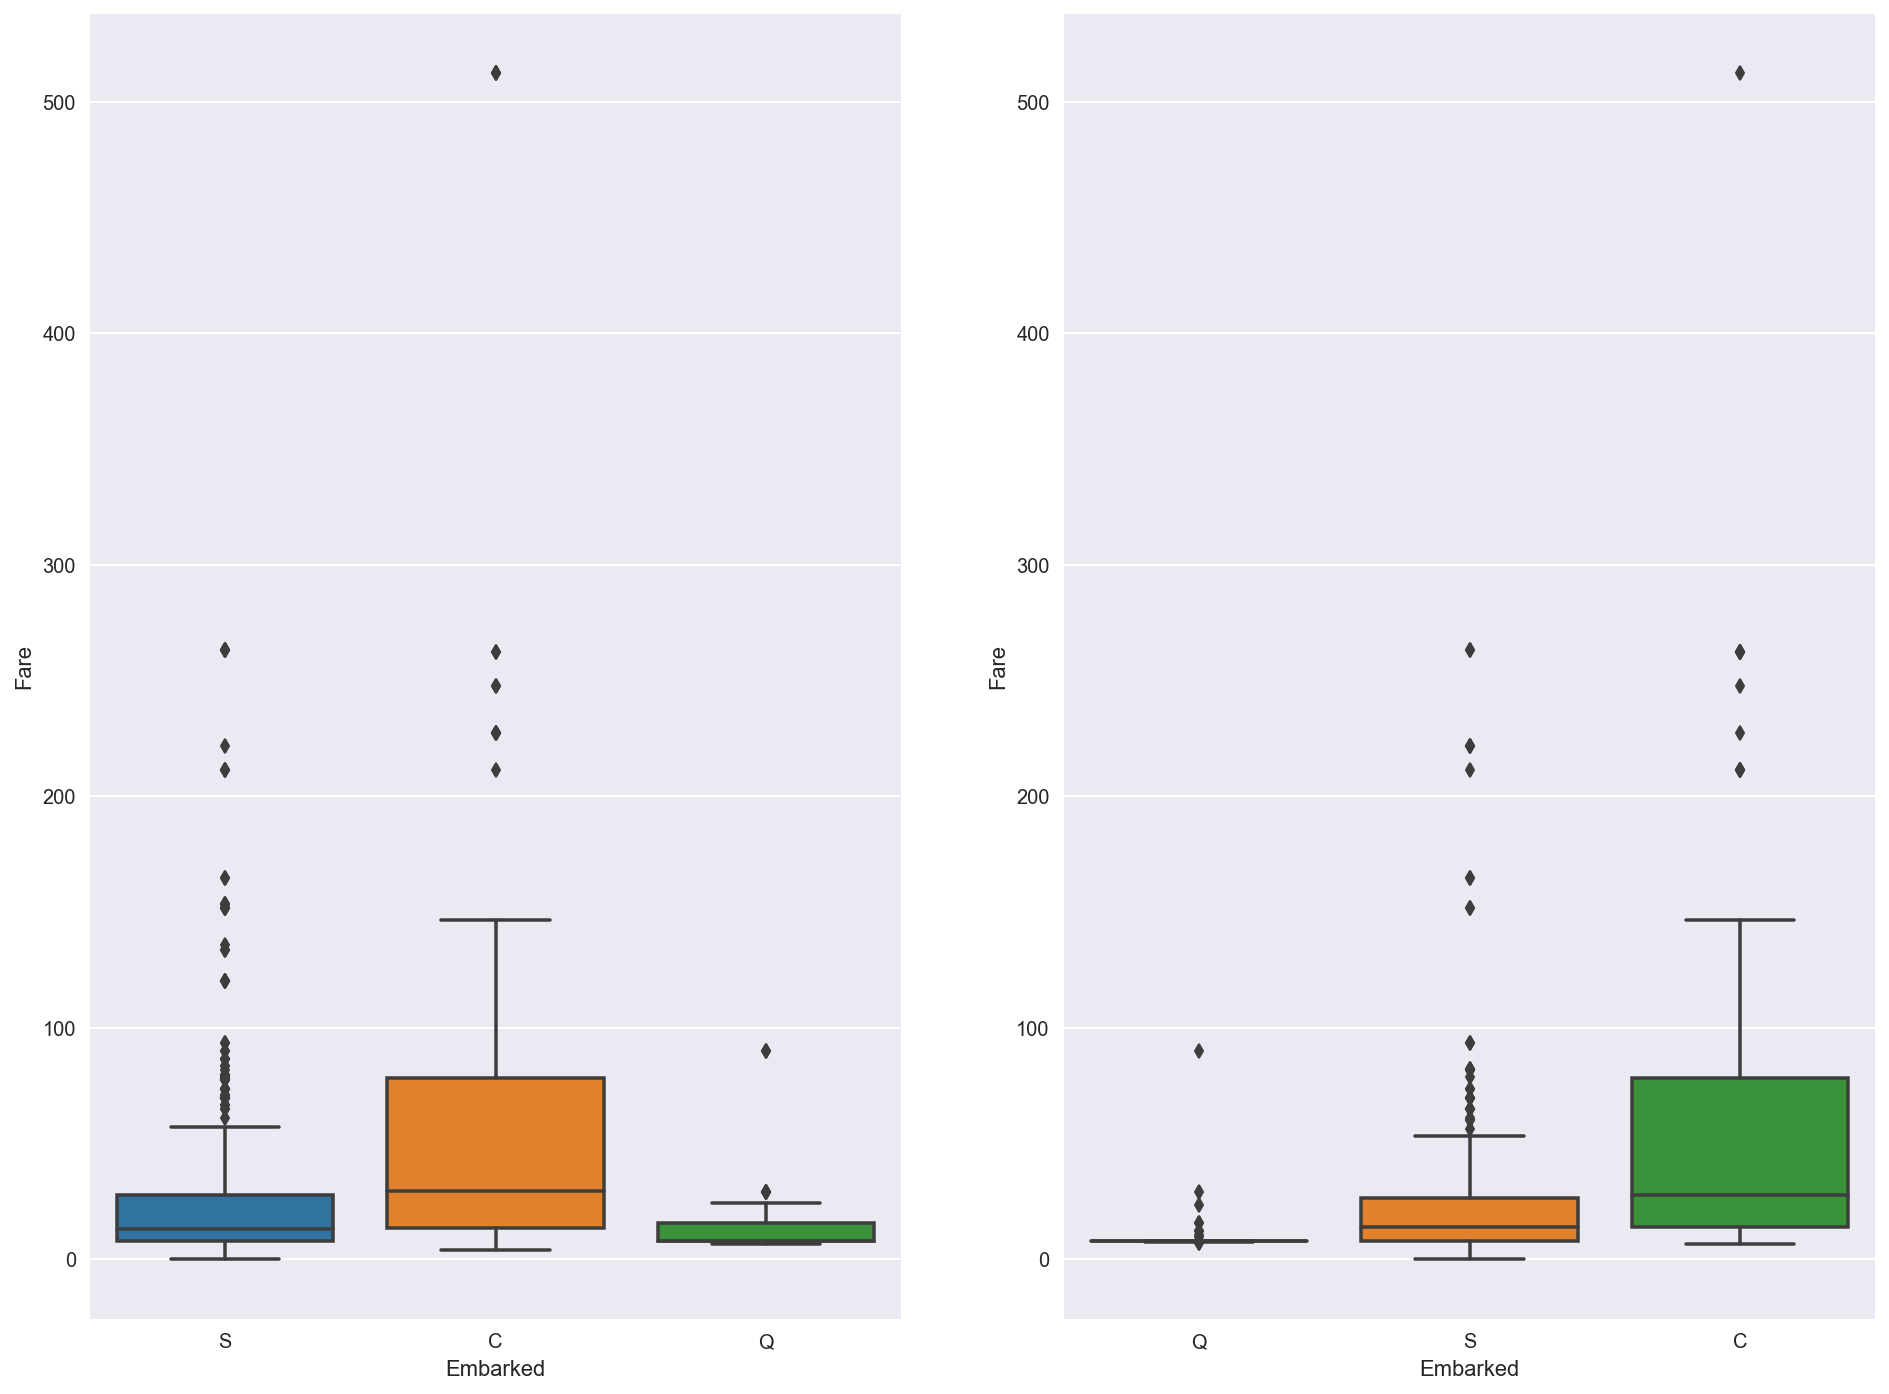

In [98]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12), ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', data =train, ax = ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', data =test, ax = ax[1])


In [99]:
#Price for missing values is 80, embarked C is closest to 80

train['Embarked'].fillna('C', inplace = True)

In [100]:
train.loc[[61, 829]]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28        C  
829  female  62.0      0      0  113572  80.0   B28        C

In [101]:
# Handling cabin missing values

In [102]:
percent_value_count(train, 'Cabin')

Total   Percent
NaN            687  0.771044
C23 C25 C27      4  0.004489
G6               4  0.004489
B96 B98          4  0.004489
D                3  0.003367
...            ...       ...
B86              1  0.001122
D19              1  0.001122
C101             1  0.001122
A32              1  0.001122
A16              1  0.001122

[148 rows x 2 columns]

In [103]:
percent_value_count(test, 'Cabin')

Total   Percent
NaN                327  0.782297
B57 B59 B63 B66      3  0.007177
E34                  2  0.004785
C6                   2  0.004785
F4                   2  0.004785
...                ...       ...
F E46                1  0.002392
D                    1  0.002392
C28                  1  0.002392
B24                  1  0.002392
C22 C26              1  0.002392

[77 rows x 2 columns]

In [104]:
survivers = train['Survived']

train.drop(['Survived'], axis =1, inplace=True)

In [106]:
all_data = pd.concat([train, test], ignore_index=False)

In [107]:
all_data.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [108]:
all_data['Cabin'].fillna('M', inplace=True)

In [115]:
all_data['Cabin'] = [i[0] for i in all_data['Cabin']]

In [116]:
percent_value_count(all_data, 'Cabin')

Total   Percent
M   1014  0.774637
C     94  0.071811
B     65  0.049656
D     46  0.035141
E     41  0.031322
A     22  0.016807
F     21  0.016043
G      5  0.003820
T      1  0.000764

In [126]:
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
M     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [127]:
#Categorize M based on the price

def cabin_value_M(i):
    a = 0
    if i<16:
        a = 'G'
    elif i>16 and i<27:
        a = 'F'
    elif i>27 and i<38:
        a = 'T'
    elif i>38 and i<47:
        a = 'A'
    elif i>47 and i<53:
        a = 'D'
    elif i>53 and i<54:
        a = 'E'
    elif i>54 and i<110:
        a = 'C'
    else:
        a = 'B'
    return a
        

In [130]:
with_M = all_data[all_data['Cabin']=='M']

In [132]:
without_M = all_data[all_data['Cabin']!='M']

In [143]:
with_M['Cabin'] = with_M['Fare'].apply(cabin_value_M)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
with_M['Cabin']

0      G
2      G
4      G
5      G
7      F
      ..
412    G
413    G
415    G
416    G
417    F
Name: Cabin, Length: 1014, dtype: object

In [142]:
with_M.sample(5)

PassengerId  Pclass                                  Name     Sex   Age  \
160         1052       3                    Smyth, Miss. Julia  female   NaN   
756          757       3          Carlsson, Mr. August Sigfrid    male  28.0   
30           922       2          Louch, Mr. Charles Alexander    male  50.0   
168          169       1                   Baumann, Mr. John D    male   NaN   
186         1078       2  Phillips, Miss. Alice Frances Louisa  female  21.0   

     SibSp  Parch       Ticket     Fare Cabin Embarked  
160      0      0       335432   7.7333     G        Q  
756      0      0       350042   7.7958     G        S  
30       1      0   SC/AH 3085  26.0000     F        S  
168      0      0     PC 17318  25.9250     F        S  
186      0      1  S.O./P.P. 2  21.0000     F        S

In [146]:
all_data = pd.concat([with_M, without_M], axis=0)

In [149]:
all_data.sort_values('PassengerId', inplace=True)

In [154]:
train = all_data[:891]
test = all_data[891:]

In [155]:
train['Survived'] = survivers

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
train

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500     G        S   
1    female  38.0      1      0          PC 17599  71.2833     C        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250     G        S   
3    female  35.0      1      0            113803  53.1000     C        S   
4      male  35.0      0      0            373450   8.0500     G        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000     G        S   
887  female  19.0      0      0            112053  30.0000     B        S   
888  female   NaN      1      2        W./C. 6607  23.4500     F        S   
889    male  26.0      0      0            111369  30.0000     C        C   
890    male  32.0      0      0            370376   7.7500     G        Q   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 12 columns]

In [163]:
test[test['Fare'].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN     B        S

In [172]:
test[(test['Sex']=='male') & (test['Embarked'] == 'S') & (test['Pclass']==3)].mean()

PassengerId    1099.326733
Pclass            3.000000
Age              24.939605
SibSp             0.425743
Parch             0.405941
Fare             12.718872
dtype: float64

In [174]:
test['Fare'].fillna(12.718872, inplace=True)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


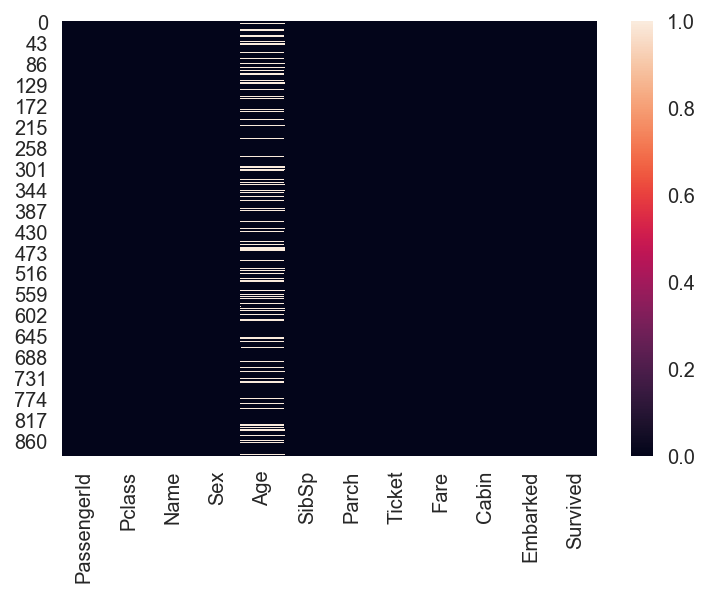

In [181]:
sns.heatmap(train.isnull())

In [203]:
train['Age'].isnull().sum()/len(train['Age'])

0.19865319865319866

In [214]:
def null_count(df, feature):
    total = df[feature].isnull().sum()
    percent = df[feature].isnull().sum()/len(df[feature])*100
    return total, percent

In [215]:
null_count(train, 'Age')

(177, 19.865319865319865)

In [216]:
null_count(test, 'Age')

(86, 20.574162679425836)

## Feature engineering

In [217]:
## Finding length of name

In [221]:
train['name_length'] = [len(i) for i in train['Name']]
test['name_length'] = [len(i) for i in test['Name']]

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500     G        S   
1  female  38.0      1      0          PC 17599  71.2833     C        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     G        S   
3  female  35.0      1      0            113803  53.1000     C        S   
4    male  35.0      0      0            373450   8.0500     G        S   

   Survived  name_length  
0         0           23  
1         1           51  
2         1           22  
3         1           44  
4         0           24

In [239]:
#grouping lengths

def group_name_length(col):
    if col<=20:
        return 'Short'
    elif col<=35:
        return 'Medium'
    elif col<=45:
        return 'Good'
    else:
        return 'Long'

In [241]:
train['name_nlength'] = train['name_length'].map(group_name_length)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
test['name_nlength'] = test['name_length'].map(group_name_length)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500     G        S   
1  female  38.0      1      0          PC 17599  71.2833     C        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     G        S   
3  female  35.0      1      0            113803  53.1000     C        S   
4    male  35.0      0      0            373450   8.0500     G        S   

   Survived  name_length name_nlength  
0         0           23       Medium  
1         1           51         Long  
2         1           22       Medium  
3         1           44         Good  
4         0           24       Medium

In [277]:
import re

def title_name(col):
    """
    Function to extract title from name
    """
    title = re.search("([A-Za-z]+\.)", col)
    
    if title:
        return title.group(1)

In [273]:
train['title'] = train['Name'].apply(title_name)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [276]:
test['title'] = test['Name'].apply(title_name)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [279]:
train['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [282]:
## Categorise title

def cat_title(i):
    """
    Categorizing title
    """
    result = ""
    if i in ['Don.', 'Rev.', 'Dr.', 'Major.', 'Lady.', 'Sir.', 'Col.', 'Capt.','Countess.', 'Jonkheer.']:
        result = 'Other.'
    elif i in ['Ms.', 'Mlle.']:
        result = 'Miss.'
    elif i in ['Mme.']:
        result = 'Mrs.'
    else:
        result = i
    return result

In [291]:
train['title'] = train['title'].apply(cat_title)

test['title'] = test['title'].apply(cat_title)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [292]:
train['title'].value_counts()

Mr.        517
Miss.      185
Mrs.       126
Master.     40
Other.      23
Name: title, dtype: int64

In [296]:
train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500     G        S   
1  female  38.0      1      0          PC 17599  71.2833     C        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     G        S   
3  female  35.0      1      0            113803  53.1000     C        S   
4    male  35.0      0      0            373450   8.0500     G        S   

   Survived  name_length name_nlength  title  
0         0           23       Medium    Mr.  
1         1           51         Long   Mrs.  
2         1           22       Medium  Miss.  
3         1           44         Good   Mrs.  
4         0           24       Medium    Mr.

In [297]:
train['fam_size'] = train['SibSp'] + train['Parch'] + 1
test['fam_size'] = test['SibSp'] + test['Parch'] + 1

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [304]:
train['fam_size'].head()

0    2
1    2
2    1
3    2
4    1
Name: fam_size, dtype: int64

In [302]:
def group_fam(col):
    """
    Grouping family based on the family size
    """
    if col<=1:
        return 'alone'
    elif col<=4:
        return 'small'
    else:
        return 'large'

In [307]:
train['fam_group'] = train['fam_size'].map(group_fam)
test['fam_group'] = test['fam_size'].map(group_fam)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [310]:
train['fam_size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: fam_size, Length: 891, dtype: int64

In [311]:
train['is_alone'] = [1 if i<2 else 0 for i in train['fam_size']]
test['is_alone'] = [1 if i<2 else 0 for i in test['fam_size']]

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [375]:
## Will later work on ticket feature

tickets1 = train['Ticket']
tickets2 = test['Ticket']

In [383]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [385]:
train['Fare']/train['fam_size']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Length: 891, dtype: float64

In [387]:
##calculating fare for each

In [386]:
train['fare_each'] = train['Fare']/train['fam_size']
test['fare_each'] = test['Fare']/test['fam_size']

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [388]:
##creating fare group

def fare_group(col):
    if col<4:
        return 'very low'
    elif col<10:
        return 'low'
    elif col<20:
        return 'mid'
    elif col<45:
        return 'high'
    else:
        return 'very high'

In [391]:
train['fare_group'] = train['fare_each'].apply(fare_group)

test['fare_group'] = test['fare_each'].apply(fare_group)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [398]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

C:\Users\sthimmap\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [399]:
train

Pclass                                               Name     Sex   Age  \
0         3                            Braund, Mr. Owen Harris    male  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2         3                             Heikkinen, Miss. Laina  female  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4         3                           Allen, Mr. William Henry    male  35.0   
..      ...                                                ...     ...   ...   
886       2                              Montvila, Rev. Juozas    male  27.0   
887       1                       Graham, Miss. Margaret Edith  female  19.0   
888       3           Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889       1                              Behr, Mr. Karl Howell    male  26.0   
890       3                                Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch     Fare Cabin Embarked  Survived  name_length name_nlength  \
0        1      0   7.2500     G        S         0           23       Medium   
1        1      0  71.2833     C        C         1           51         Long   
2        0      0   7.9250     G        S         1           22       Medium   
3        1      0  53.1000     C        S         1           44         Good   
4        0      0   8.0500     G        S         0           24       Medium   
..     ...    ...      ...   ...      ...       ...          ...          ...   
886      0      0  13.0000     G        S         0           21       Medium   
887      0      0  30.0000     B        S         1           28       Medium   
888      1      2  23.4500     F        S         0           40         Good   
889      0      0  30.0000     C        C         1           21       Medium   
890      0      0   7.7500     G        Q         0           19        Short   

      title  fam_size fam_group  is_alone  fare_each fare_group  
0       Mr.         2     small         0    3.62500   very low  
1      Mrs.         2     small         0   35.64165       high  
2     Miss.         1     alone         1    7.92500        low  
3      Mrs.         2     small         0   26.55000       high  
4       Mr.         1     alone         1    8.05000        low  
..      ...       ...       ...       ...        ...        ...  
886  Other.         1     alone         1   13.00000        mid  
887   Miss.         1     alone         1   30.00000       high  
888   Miss.         4     small         0    5.86250        low  
889     Mr.         1     alone         1   30.00000       high  
890     Mr.         1     alone         1    7.75000        low  

[891 rows x 18 columns]

In [400]:
## creating dummy variables

In [402]:
train.head(2)

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

   SibSp  Parch     Fare Cabin Embarked  Survived  name_length name_nlength  \
0      1      0   7.2500     G        S         0           23       Medium   
1      1      0  71.2833     C        C         1           51         Long   

  title  fam_size fam_group  is_alone  fare_each fare_group  
0   Mr.         2     small         0    3.62500   very low  
1  Mrs.         2     small         0   35.64165       high

In [405]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Cabin',
       'Embarked', 'name_nlength', 'title', 'fam_group', 'fare_group'], drop_first=False)

test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Cabin',
       'Embarked', 'name_nlength', 'title', 'fam_group', 'fare_group'], drop_first=False)

In [406]:
train.head(2)

Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   

      Fare  Survived  name_length  fam_size  is_alone  fare_each  ...  \
0   7.2500         0           23         2         0    3.62500  ...   
1  71.2833         1           51         2         0   35.64165  ...   

   title_Mrs.  title_Other.  fam_group_alone  fam_group_large  \
0           0             0                0                0   
1           1             0                0                0   

   fam_group_small  fare_group_high  fare_group_low  fare_group_mid  \
0                1                0               0               0   
1                1                1               0               0   

   fare_group_very high  fare_group_very low  
0                     0                    1  
1                     0                    0  

[2 rows x 43 columns]

In [407]:
train.drop(['Name', 'Fare', 'name_length', 'fam_size'], axis=1, inplace=True)
test.drop(['Name', 'Fare', 'name_length', 'fam_size'], axis=1, inplace=True)

In [411]:
null_count(train, 'Age')

(177, 19.865319865319865)

In [415]:
null_count(test, 'Age')

(86, 20.574162679425836)

In [412]:
## We will used random forest classifier to find missing age

In [418]:
train.head(2)

Age  SibSp  Parch  Survived  is_alone  fare_each  Pclass_1  Pclass_2  \
0  22.0      1      0         0         0    3.62500         0         0   
1  38.0      1      0         1         0   35.64165         1         0   

   Pclass_3  Sex_female  ...  title_Mrs.  title_Other.  fam_group_alone  \
0         1           0  ...           0             0                0   
1         0           1  ...           1             0                0   

   fam_group_large  fam_group_small  fare_group_high  fare_group_low  \
0                0                1                0               0   
1                0                1                1               0   

   fare_group_mid  fare_group_very high  fare_group_very low  
0               0                     0                    1  
1               0                     0                    0  

[2 rows x 39 columns]

In [417]:
test.head(2)

Age  SibSp  Parch  is_alone  fare_each  Pclass_1  Pclass_2  Pclass_3  \
0  34.5      0      0         1     7.8292         0         0         1   
1  47.0      1      0         0     3.5000         0         0         1   

   Sex_female  Sex_male  ...  title_Mrs.  title_Other.  fam_group_alone  \
0           0         1  ...           0             0                1   
1           1         0  ...           1             0                0   

   fam_group_large  fam_group_small  fare_group_high  fare_group_low  \
0                0                0                0               1   
1                0                1                0               0   

   fare_group_mid  fare_group_very high  fare_group_very low  
0               0                     0                    0  
1               0                     0                    1  

[2 rows x 39 columns]

In [419]:
from sklearn.ensemble import RandomForestRegressor

In [423]:
cols = train.columns.tolist()

In [449]:
cols = cols[3:4] + cols[0:3] + cols[4:]

In [450]:
train = train[cols]

In [451]:
train.head(2)

Survived   Age  SibSp  Parch  is_alone  fare_each  Pclass_1  Pclass_2  \
0         0  22.0      1      0         0    3.62500         0         0   
1         1  38.0      1      0         0   35.64165         1         0   

   Pclass_3  Sex_female  ...  title_Mrs.  title_Other.  fam_group_alone  \
0         1           0  ...           0             0                0   
1         0           1  ...           1             0                0   

   fam_group_large  fam_group_small  fare_group_high  fare_group_low  \
0                0                1                0               0   
1                0                1                1               0   

   fare_group_mid  fare_group_very high  fare_group_very low  
0               0                     0                    1  
1               0                     0                    0  

[2 rows x 39 columns]

In [461]:
def calculate_age(df):
    age_df = df.loc[:, 'Age':]
    
    temp_train = df.loc[df['Age'].notnull()]
    temp_test = df.loc[df['Age'].isnull()]
    
    y = temp_train['Age'].values
    x = temp_train.loc[:, 'SibSp':].values
    
    rfr = RandomForestRegressor(n_estimators=1550, n_jobs=-1)
    
    rfr.fit(x,y)
    
    predicted_age = rfr.predict(temp_test.loc[:, 'SibSp':])
    df.loc[df['Age'].isnull(), 'Age'] = predicted_age
    
    return df

In [462]:
calculate_age(train)

Survived        Age  SibSp  Parch  is_alone  fare_each  Pclass_1  \
0           0  22.000000      1      0         0    3.62500         0   
1           1  38.000000      1      0         0   35.64165         1   
2           1  26.000000      0      0         1    7.92500         0   
3           1  35.000000      1      0         0   26.55000         1   
4           0  35.000000      0      0         1    8.05000         0   
..        ...        ...    ...    ...       ...        ...       ...   
886         0  27.000000      0      0         1   13.00000         0   
887         1  19.000000      0      0         1   30.00000         1   
888         0  10.095227      1      2         0    5.86250         0   
889         1  26.000000      0      0         1   30.00000         1   
890         0  32.000000      0      0         1    7.75000         0   

     Pclass_2  Pclass_3  Sex_female  ...  title_Mrs.  title_Other.  \
0           0         1           0  ...           0             0   
1           0         0           1  ...           1             0   
2           0         1           1  ...           0             0   
3           0         0           1  ...           1             0   
4           0         1           0  ...           0             0   
..        ...       ...         ...  ...         ...           ...   
886         1         0           0  ...           0             1   
887         0         0           1  ...           0             0   
888         0         1           1  ...           0             0   
889         0         0           0  ...           0             0   
890         0         1           0  ...           0             0   

     fam_group_alone  fam_group_large  fam_group_small  fare_group_high  \
0                  0                0                1                0   
1                  0                0                1                1   
2                  1                0                0                0   
3                  0                0                1                1   
4                  1                0                0                0   
..               ...              ...              ...              ...   
886                1                0                0                0   
887                1                0                0                1   
888                0                0                1                0   
889                1                0                0                1   
890                1                0                0                0   

     fare_group_low  fare_group_mid  fare_group_very high  fare_group_very low  
0                 0               0                     0                    1  
1                 0               0                     0                    0  
2                 1               0                     0                    0  
3                 0               0                     0                    0  
4                 1               0                     0                    0  
..              ...             ...                   ...                  ...  
886               0               1                     0                    0  
887               0               0                     0                    0  
888               1               0                     0                    0  
889               0               0                     0                    0  
890               1               0                     0                    0  

[891 rows x 39 columns]

In [463]:
calculate_age(test)

Age  SibSp  Parch  is_alone   fare_each  Pclass_1  Pclass_2  \
0    34.500000      0      0         1    7.829200         0         0   
1    47.000000      1      0         0    3.500000         0         0   
2    62.000000      0      0         1    9.687500         0         1   
3    27.000000      0      0         1    8.662500         0         0   
4    22.000000      1      1         0    4.095833         0         0   
..         ...    ...    ...       ...         ...       ...       ...   
413  23.252632      0      0         1    8.050000         0         0   
414  39.000000      0      0         1  108.900000         1         0   
415  38.500000      0      0         1    7.250000         0         0   
416  23.252632      0      0         1    8.050000         0         0   
417   7.136542      1      1         0    7.452767         0         0   

     Pclass_3  Sex_female  Sex_male  ...  title_Mrs.  title_Other.  \
0           1           0         1  ...           0             0   
1           1           1         0  ...           1             0   
2           0           0         1  ...           0             0   
3           1           0         1  ...           0             0   
4           1           1         0  ...           1             0   
..        ...         ...       ...  ...         ...           ...   
413         1           0         1  ...           0             0   
414         0           1         0  ...           0             0   
415         1           0         1  ...           0             0   
416         1           0         1  ...           0             0   
417         1           0         1  ...           0             0   

     fam_group_alone  fam_group_large  fam_group_small  fare_group_high  \
0                  1                0                0                0   
1                  0                0                1                0   
2                  1                0                0                0   
3                  1                0                0                0   
4                  0                0                1                0   
..               ...              ...              ...              ...   
413                1                0                0                0   
414                1                0                0                0   
415                1                0                0                0   
416                1                0                0                0   
417                0                0                1                0   

     fare_group_low  fare_group_mid  fare_group_very high  fare_group_very low  
0                 1               0                     0                    0  
1                 0               0                     0                    1  
2                 1               0                     0                    0  
3                 1               0                     0                    0  
4                 1               0                     0                    0  
..              ...             ...                   ...                  ...  
413               1               0                     0                    0  
414               0               0                     1                    0  
415               1               0                     0                    0  
416               1               0                     0                    0  
417               1               0                     0                    0  

[418 rows x 39 columns]

In [464]:
## grouping age

def age_group(col):
    
    if col<=1:
        return 'infant'
    elif col<=4:
        return 'toddler'
    elif col<=13:
        return 'child'
    elif col<=19:
        return 'teenager'
    elif col<=35:
        return 'young_adult'
    elif col<=45:
        return 'adult'
    elif col<=55:
        return 'middle aged'
    elif col<=65:
        return 'senior citizen'
    else:
        return 'old'

In [467]:
train['age_group'] = train['Age'].apply(age_group)
test['age_group'] = test['Age'].apply(age_group)

In [470]:
train = pd.get_dummies(train, columns=['age_group'], drop_first=True)
test = pd.get_dummies(test, columns=['age_group'], drop_first=True)

## Pre modelling

In [473]:
## Splitting the data

In [474]:
from sklearn.model_selection import train_test_split

In [484]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [485]:
## feature scaling

In [486]:
train.head()

Survived   Age  SibSp  Parch  is_alone  fare_each  Pclass_1  Pclass_2  \
0         0  22.0      1      0         0    3.62500         0         0   
1         1  38.0      1      0         0   35.64165         1         0   
2         1  26.0      0      0         1    7.92500         0         0   
3         1  35.0      1      0         0   26.55000         1         0   
4         0  35.0      0      0         1    8.05000         0         0   

   Pclass_3  Sex_female  ...  fare_group_very high  fare_group_very low  \
0         1           0  ...                     0                    1   
1         0           1  ...                     0                    0   
2         1           1  ...                     0                    0   
3         0           1  ...                     0                    0   
4         1           0  ...                     0                    0   

   age_group_child  age_group_infant  age_group_middle aged  age_group_old  \
0                0                 0                      0              0   
1                0                 0                      0              0   
2                0                 0                      0              0   
3                0                 0                      0              0   
4                0                 0                      0              0   

   age_group_senior citizen  age_group_teenager  age_group_toddler  \
0                         0                   0                  0   
1                         0                   0                  0   
2                         0                   0                  0   
3                         0                   0                  0   
4                         0                   0                  0   

   age_group_young_adult  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1  

[5 rows x 47 columns]

In [479]:
## Age and fare can be used for feature scaling

In [480]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

In [488]:
headers = X_train.columns

In [489]:
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

In [490]:
pd.DataFrame(X_train, columns=headers)

Age     SibSp     Parch  is_alone  fare_each  Pclass_1  Pclass_2  \
0   -0.051674 -0.455235 -0.469509  0.803996  -0.281753 -0.577350  1.931362   
1    0.455225 -0.455235 -0.469509  0.803996  -0.209699 -0.577350  1.931362   
2    2.265581 -0.455235 -0.469509  0.803996   0.381139  1.732051 -0.517769   
3    1.106953 -0.455235 -0.469509  0.803996   0.180831  1.732051 -0.517769   
4    0.310397 -0.455235 -0.469509  0.803996  -0.209699 -0.577350  1.931362   
..        ...       ...       ...       ...        ...       ...       ...   
591  0.672468  0.403373  0.721246 -1.243788   0.214535  1.732051 -0.517769   
592 -0.775816  0.403373 -0.469509 -1.243788  -0.471193 -0.577350 -0.517769   
593 -0.254981 -0.455235 -0.469509  0.803996  -0.361493 -0.577350 -0.517769   
594  0.455225  0.403373 -0.469509 -1.243788  -0.333631 -0.577350 -0.517769   
595  2.193166  0.403373  0.721246 -1.243788  -0.209699 -0.577350  1.931362   

     Pclass_3  Sex_female  Sex_male  ...  fare_group_very high  \
0   -1.080404   -0.724083  0.724083  ...             -0.312419   
1   -1.080404   -0.724083  0.724083  ...             -0.312419   
2   -1.080404   -0.724083  0.724083  ...             -0.312419   
3   -1.080404   -0.724083  0.724083  ...             -0.312419   
4   -1.080404   -0.724083  0.724083  ...             -0.312419   
..        ...         ...       ...  ...                   ...   
591 -1.080404    1.381057 -1.381057  ...             -0.312419   
592  0.925580    1.381057 -1.381057  ...             -0.312419   
593  0.925580   -0.724083  0.724083  ...             -0.312419   
594  0.925580    1.381057 -1.381057  ...             -0.312419   
595 -1.080404   -0.724083  0.724083  ...             -0.312419   

     fare_group_very low  age_group_child  age_group_infant  \
0              -0.191107        -0.230225         -0.123823   
1              -0.191107        -0.230225         -0.123823   
2              -0.191107        -0.230225         -0.123823   
3              -0.191107        -0.230225         -0.123823   
4              -0.191107        -0.230225         -0.123823   
..                   ...              ...               ...   
591            -0.191107        -0.230225         -0.123823   
592             5.232681        -0.230225         -0.123823   
593            -0.191107        -0.230225         -0.123823   
594            -0.191107        -0.230225         -0.123823   
595            -0.191107        -0.230225         -0.123823   

     age_group_middle aged  age_group_old  age_group_senior citizen  \
0                -0.299298       -0.09198                 -0.195774   
1                -0.299298       -0.09198                 -0.195774   
2                -0.299298       -0.09198                  5.107926   
3                -0.299298       -0.09198                 -0.195774   
4                -0.299298       -0.09198                 -0.195774   
..                     ...            ...                       ...   
591              -0.299298       -0.09198                 -0.195774   
592              -0.299298       -0.09198                 -0.195774   
593              -0.299298       -0.09198                 -0.195774   
594              -0.299298       -0.09198                 -0.195774   
595              -0.299298       -0.09198                  5.107926   

     age_group_teenager  age_group_toddler  age_group_young_adult  
0             -0.352886          -0.191107               1.051669  
1             -0.352886          -0.191107              -0.950870  
2             -0.352886          -0.191107              -0.950870  
3             -0.352886          -0.191107              -0.950870  
4             -0.352886          -0.191107               1.051669  
..                  ...                ...                    ...  
591           -0.352886          -0.191107              -0.950870  
592            2.833779          -0.191107              -0.950870  
593           -0.352886          -0.191107               1

## Modelling data

## Logistic Regression

In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [498]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

In [499]:
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

## Evaluation

In [503]:
from sklearn.metrics import confusion_matrix, classification_report

In [506]:
pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted-0', 'Predicted-1'], index=['Actual-0', 'Actual-1'])

Predicted-0  Predicted-1
Actual-0          155           29
Actual-1           26           85

In [509]:
pred.shape

(295,)

In [513]:
len(y_test)

295

In [510]:
TP = 85
TN = 155
FP = 29
FN = 26

In [511]:
##Accuracy
(85+155)/295

0.8135593220338984

In [514]:
accuracy_score(y_test, pred)

0.8135593220338984

In [515]:
## Error rate

In [516]:
(26+26)/295

0.17627118644067796

In [517]:
## Recall Score

85/(85+26)

0.7657657657657657

In [518]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.7657657657657657

In [519]:
## False positive 

29/(29+155)

0.15760869565217392

In [520]:
## True negative
155/(155+29)

0.842391304347826

In [521]:
## Precision

85/(85+29)

0.7456140350877193

In [522]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.7456140350877193

In [524]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       184
           1       0.75      0.77      0.76       111

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



In [569]:
## AUC & ROC Curve

In [570]:
from sklearn.metrics import auc, roc_curve

In [572]:
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)

ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)

0.8695162553858206


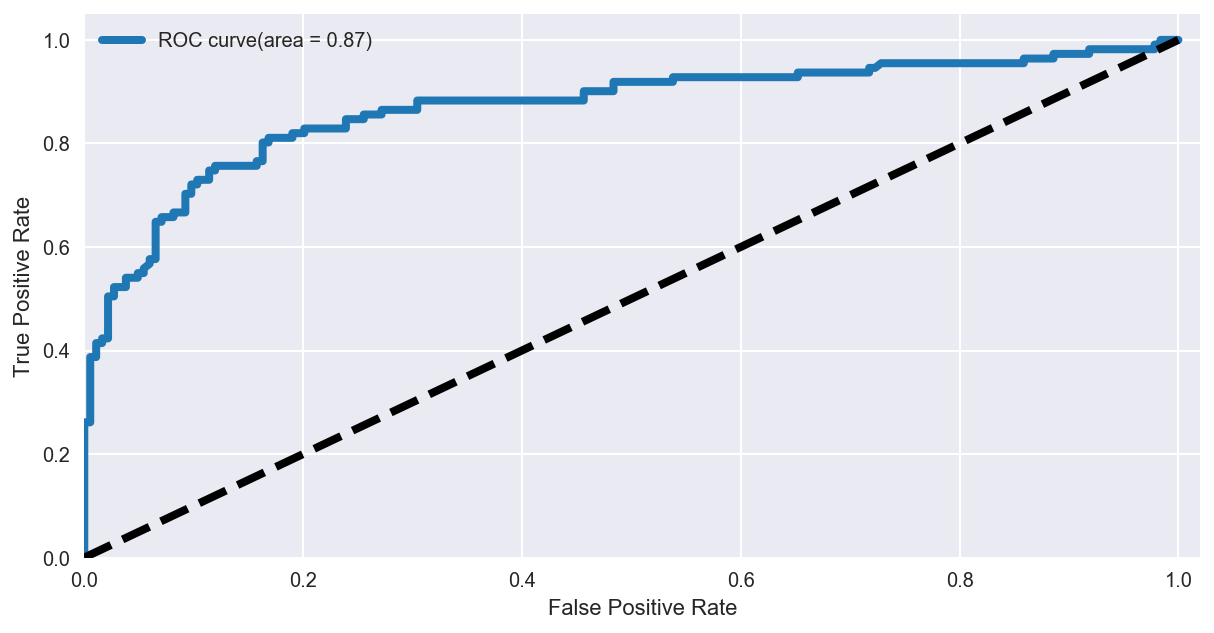

In [599]:
plt.figure(figsize=(10,5))
plt.plot(FPR, TPR,label= 'ROC curve(area = %0.2f)' %ROC_AUC, linewidth=4)
plt.plot([0,1],[0,1], 'k--', lw=4)
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [593]:
## Recall precision curve

In [590]:
from sklearn.metrics import precision_recall_curve

In [591]:
y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

PR_AUC

0.8486800140831139

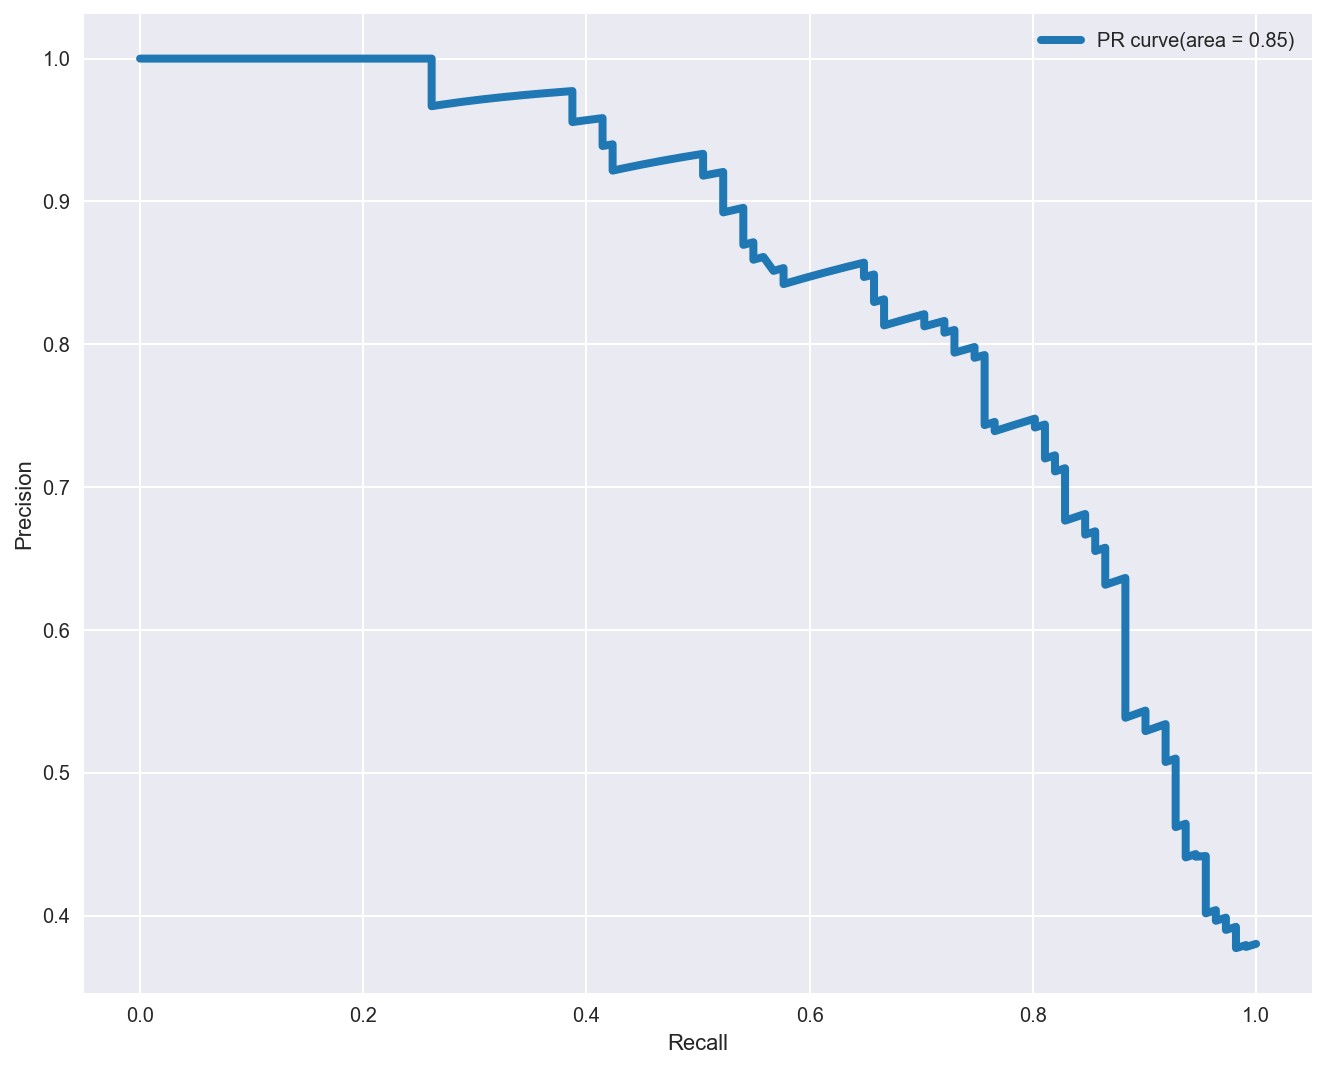

In [598]:
plt.figure(figsize = (11,9))

plt.plot(recall, precision,label='PR curve(area = %0.2f)'%PR_AUC, lw=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [602]:
## cross validation

In [609]:
#using standard scaler object

sc = std_scale

In [610]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [613]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
column_names = X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [612]:
X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'),X, y, cv=cv )

print('Cross validation accuracy score: {}'.format(accuracies))
print('\n')
print('Mean cross validation accuracy score:{}'.format(round(accuracies.mean(), 5)))

Cross validation accuracy score: [0.81165919 0.80269058 0.82959641 0.86547085 0.8161435  0.80269058
 0.81165919 0.86995516 0.82959641 0.8206278 ]


Mean cross validation accuracy score:0.82601


In [614]:
## Grid search on logistic regression

from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [622]:
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1','l2'] 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

param = {'penalty': penalties, 'C': C_vals}

grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty'

In [623]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8345291479820627
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.2, 'penalty': 'l1'}


In [624]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8383838383838383

## K-Nearest Neighbor Calssifier

In [625]:
from sklearn.neighbors import KNeighborsClassifier

In [628]:
knn = KNeighborsClassifier()

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=0)

accuracies = cross_val_score(knn, X,y, cv=cv)

print('CV score:{}'.format(accuracies))
print('Mean CV:{}'.format(round(accuracies.mean(), 5)))

CV score:[0.78923767 0.77130045 0.78475336 0.82511211 0.78026906 0.77130045
 0.77578475 0.81165919 0.76681614 0.8206278 ]
Mean CV:0.78969


In [629]:
## Finding best k value mnually

In [634]:
k_score = []

for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv)
    k_score.append(scores.mean())
    print('Accuracy scores:{}'.format(k_score), 'K is ', k)
    print('Mean accuracy scores:{}'.format(np.mean(k_score)))

Accuracy scores:[0.7466367713004484] K is  1
Mean accuracy scores:0.7466367713004484
Accuracy scores:[0.7466367713004484, 0.7654708520179373] K is  2
Mean accuracy scores:0.7560538116591928
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466] K is  3
Mean accuracy scores:0.7659192825112108
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879] K is  4
Mean accuracy scores:0.77152466367713
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879, 0.7896860986547086] K is  5
Mean accuracy scores:0.7751569506726457
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879, 0.7896860986547086, 0.7865470852017937] K is  6
Mean accuracy scores:0.7770553064275036
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879, 0.7896860986547086, 0.7865470852017937, 0.7820627802690583] K is  7
Mean accuracy scores:0.7777

Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879, 0.7896860986547086, 0.7865470852017937, 0.7820627802690583, 0.7860986547085201, 0.7883408071748879, 0.7905829596412557, 0.7905829596412556, 0.7995515695067265, 0.7995515695067266, 0.8013452914798206, 0.8044843049327353, 0.804932735426009, 0.8067264573991031, 0.7999999999999999, 0.8013452914798206, 0.7946188340807174, 0.7977578475336323, 0.7928251121076233, 0.7964125560538118, 0.7865470852017937, 0.7946188340807174, 0.7843049327354261, 0.7878923766816143] K is  27
Mean accuracy scores:0.7908486962298623
Accuracy scores:[0.7466367713004484, 0.7654708520179373, 0.7856502242152466, 0.7883408071748879, 0.7896860986547086, 0.7865470852017937, 0.7820627802690583, 0.7860986547085201, 0.7883408071748879, 0.7905829596412557, 0.7905829596412556, 0.7995515695067265, 0.7995515695067266, 0.8013452914798206, 0.8044843049327353, 0.804932735426009, 0.8067264573991031, 0.7999999999999999, 0.8013452914798206,

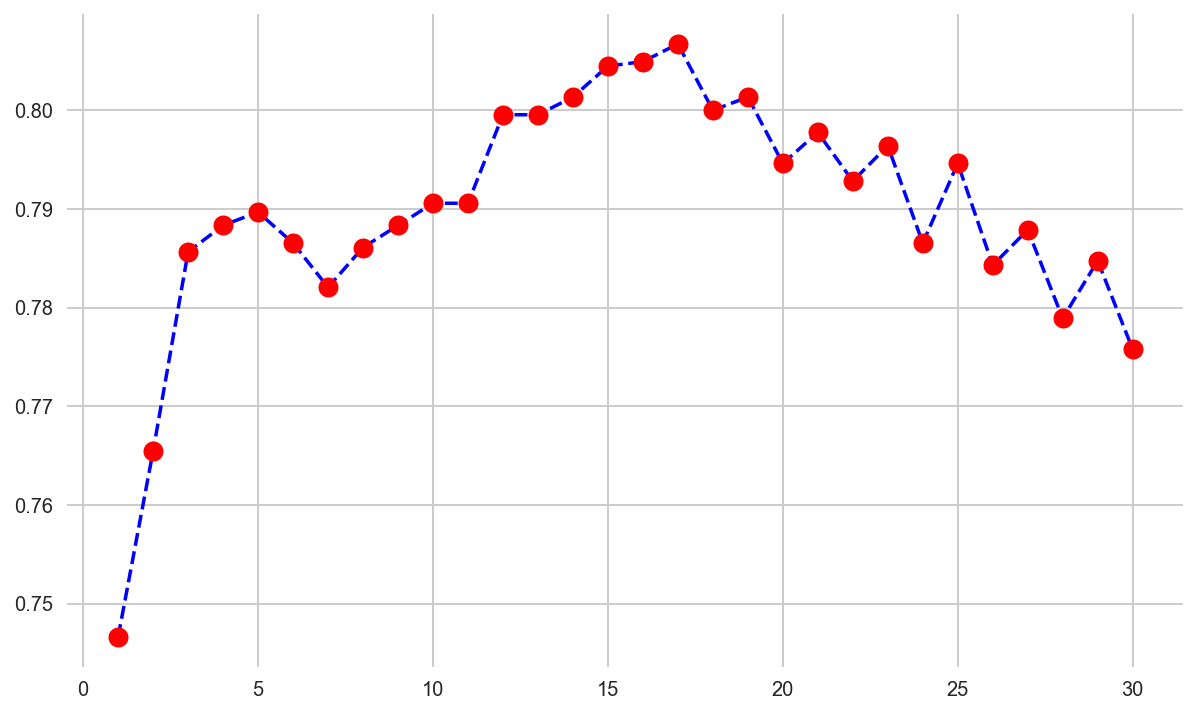

In [635]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31), k_score, color='blue', ls='--',marker='o', markerfacecolor='red', markersize=10)
sns.set_style('whitegrid')

In [637]:
## Grid search on KNN

In [638]:
from sklearn.model_selection import GridSearchCV

In [640]:
k_range = range(1,40)

weights_option = ['uniform', 'distance']
param = {'n_neighbors':k_range, 'weights':weights_option}
CV = StratifiedShuffleSplit(n_splits=10, test_size=.3, random_state=15)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv = cv, n_jobs=-1)

grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 40),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [641]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
{'n_neighbors': 17, 'weights': 'uniform'}
0.8067264573991031


In [642]:
knn_grid = grid.best_estimator_

knn_grid.score(X,y)

0.8327721661054994

In [644]:
## Using RandomizedSearchCv
## Similar to GSCV, but bit fast

In [645]:
from sklearn.model_selection import RandomizedSearchCV

In [648]:
k_range = range(1,40)
weight_options = ['uniform', 'distance']
param = {'n_neighbors':k_range, 'weights': weight_options}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.3)

rscv = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param, n_jobs=-1, n_iter=40) 
rscv.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 40),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [649]:
print(rscv.best_estimator_)
print(rscv.best_index_)
print(rscv.best_params_)
print(rscv.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
32
{'weights': 'uniform', 'n_neighbors': 17}
0.8013997865796245


In [699]:
knn_rscv = rscv.best_estimator_
knn_rscv.score(X,y)

0.8327721661054994

## Decision Tree Classifier

In [700]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold

In [701]:
max_feature = [21,22,23,24,25,26,27,28,29,30, 'auto']

criterion = ['entropy', 'gini']

param = {'criterion':criterion, 'max_features':max_feature}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

grid_dct = GridSearchCV(DecisionTreeClassifier(), param_grid=param, n_jobs=-1, cv= cv)

grid_dct.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [702]:
dct_grid = grid_dct.best_estimator_
dct_grid.score(X,y)

0.9887766554433222

In [703]:
pd.DataFrame(dct_grid.feature_importances_, index=column_names, columns=['Importance']).sort_values('Importance', ascending=False).head(10)

Importance
Sex_male                 0.233281
Age                      0.185865
fare_each                0.182875
Pclass_3                 0.087928
fam_group_small          0.044024
title_Master.            0.034586
SibSp                    0.020891
name_nlength_Short       0.017085
age_group_young_adult    0.015416
fam_group_large          0.014584

## Random forest

In [705]:
from sklearn.ensemble import RandomForestClassifier

In [706]:
n_estimators = [150, 155, 160, 165, 170, 175]
max_depth = range(1,10)
criterion = ['gini', 'entropy']

param = {'n_estimators':n_estimators, 'max_depth':max_depth, 'criterion':criterion}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param, cv=cv, n_jobs=-1)
grid_rf.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
      

In [707]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_score_)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=155,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 155}
0.8388059701492538


In [708]:
rf_grid = grid_rf.best_estimator_
rf_grid.score(X,y)

0.8451178451178452

In [711]:
print(classification_report(y_test, pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       184
           1       0.75      0.77      0.76       111

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

